# Proyecto Final — Análisis Stack Overflow (2023–2025)

**Autor:** Franco
**Curso:** Python Avanzado en Data Science
**Fecha:** 14/10/2025

**Resumen:** Notebook autocontenido y listo para entrega. Analiza la relación entre experiencia, lenguajes y compensación (USD).

## Estructura
1. Parámetros y rutas (definir CSV locales).
2. Carga selectiva de columnas.
3. Limpieza, conteos pre/post filtros y conversión FX en memoria.
4. Análisis exploratorio, validación de 5 hipótesis y conclusiones.

> Nota: coloque los CSVs en las rutas indicadas en la celda `DATA_PATHS` antes de ejecutar.

## Constantes y funciones auxiliares

In [6]:
# Constantes y rutas de datos
DATA_PATHS = {
  '2023': 'data/developer-survey-2023/survey_results_public.csv',
  '2024': 'data/developer-survey-2024/survey_results_public.csv',
  '2025': 'data/developer-survey-2025/survey_results_public.csv',
}

ANIOS = list(DATA_PATHS.keys())

# Columnas de interés
VARIABLES_ANIDADAS = [
  "LanguageHaveWorkedWith", "LanguageWantToWorkWith",
  "WebframeHaveWorkedWith",
  "DatabaseHaveWorkedWith",
  "PlatformHaveWorkedWith"
]

VARIABLES_NUMERICAS = [
  "CompTotal",
  "WorkExp",
  "YearsCode"
]

VARIABLES_CATEGORICAS = [
  "Age",
  "OrgSize",
  "RemoteWork",
  "Country",
  "Currency",
]

VARIABLES_DE_MUCHAS_OPCIONES = [
  "Employment",
  "DevType",
  "Industry",
]

COLUMNAS_A_ANALIZAR = [
  "Age", "Employment",
  "WorkExp", "DevType",
  "OrgSize", "Industry",
  "RemoteWork", "Country",
  "Currency", "CompTotal",
  'YearsCode',
  "DatabaseHaveWorkedWith",
  "PlatformHaveWorkedWith",
  "WebframeHaveWorkedWith",
  "OpSysProfessional use",
  #
  "LanguageHaveWorkedWith", "LanguageWantToWorkWith",
]


In [7]:
# Funciones auxiliares
def separator(texto=""):
  print(f"\n{'=' * 45}\n{texto}\n{'=' * 45}")


#---
def shape_dataframe(df_a_resumir):
  print(f"- Filas: {df_a_resumir.shape[0]}")
  print(f"- Columnas: {df_a_resumir.shape[1]}")


def resumen_dataframe(df_a_resumir, nombre="DataFrame"):
  print(f"\n📊 Resumen de {nombre}:")
  shape_dataframe(df_a_resumir)
  print(f"- Tipos de datos:\n{df_a_resumir.dtypes}")
  print("- Primeras 5 filas:")
  display(df_a_resumir.head())


#---

def resumen_estadistico_con_print(df_a_describir, nombre="DataFrame"):
  print(f"\n📊 Resumen estadístico de {nombre}:")
  print(df_a_describir.describe(include='all').T)


def resumen_estadistico(df_a_describir):
  return df_a_describir.describe(include='all').T


#---

def contador_de_frecuencia_con_print(df_a_contar, nombre="DataFrame"):
  print(f"\nFrecuencia en {nombre}:")
  print(df_a_contar.nunique())


def contador_de_frecuencia(df_a_contar):
  return df_a_contar.nunique()


#---

def contador_de_nulos_con_print(df_a_contar, nombre="DataFrame"):
  print(f"\nConteo de nulos en {nombre:}")
  print(df_a_contar.isnull().sum())
  print(f"Total de nulos: {df_a_contar.isnull().sum().sum()}")


def contador_de_nulos(df_a_contar):
  return df_a_contar.isnull().sum()


#---

def valores_mas_comunes_con_print(df_a_contar, columna, n=10):
  print(f"\nLos {n} valores más comunes en '{columna}':")
  print(df_a_contar[columna].value_counts().head(n))


def valores_mas_comunes(df_a_contar, columna, n=10):
  return df_a_contar[columna].value_counts().head(n)

## Configuración e Importación de Librerías

In [1]:

try:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings

  plt.style.use('seaborn-v0_8-darkgrid')
  sns.set_palette("Set2")

  %matplotlib inline

  # Configuración de pandas para mejor visualización
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', 100)
  pd.set_option('display.width', 1000)

  warnings.filterwarnings('ignore')

  # Configuración de gráficos (para presentaciones)
  plt.rcParams['figure.figsize'] = (16, 8)
  plt.rcParams['font.size'] = 12
  plt.rcParams['axes.titlesize'] = 14
  plt.rcParams['axes.labelsize'] = 12
  plt.rcParams['xtick.labelsize'] = 10
  plt.rcParams['ytick.labelsize'] = 10
  plt.rcParams['legend.fontsize'] = 10

  print("✅ Librerías importadas correctamente")

except ImportError as e:
  print(f"❌ Error al importar librerías: {e}")
except Exception as e:
  print(f"❌ Error inesperado: {e}")

✅ Librerías importadas correctamente


## Carga de datos de las encuestas

In [4]:
df = {}

for year, path in DATA_PATHS.items():
  try:
    df[year] = pd.read_csv(path, usecols=COLUMNAS_A_ANALIZAR, low_memory=False)
    print("✅ Cargado", year, "con", df[year].shape[0], "filas y", df[year].shape[1], "columnas.")

  except FileNotFoundError:
    print(f"⚠️ Archivo {year} no encontrado: {path}")

  except Exception as e:
    print(f"❌ Error al cargar {year}: {e})")
    print(f"📊 Total de años cargados: {len(df)}")

✅ Cargado 2023 con 89184 filas y 17 columnas.
✅ Cargado 2024 con 65437 filas y 17 columnas.
✅ Cargado 2025 con 49123 filas y 17 columnas.


## Resumen de los datos cargados

### Composición y tipos de datos

In [5]:
for anio in ANIOS:
  separator(f"Resumen inicial de datos - {anio}")
  resumen_dataframe(df[anio], nombre=f"Encuesta {anio}")


Resumen inicial de datos - 2023

📊 Resumen de Encuesta 2023:
- Filas: 89184
- Columnas: 17
- Tipos de datos:
Age                        object
Employment                 object
RemoteWork                 object
YearsCode                  object
DevType                    object
OrgSize                    object
Country                    object
Currency                   object
CompTotal                 float64
LanguageHaveWorkedWith     object
LanguageWantToWorkWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
WebframeHaveWorkedWith     object
OpSysProfessional use      object
WorkExp                   float64
Industry                   object
dtype: object
- Primeras 5 filas:


,Age,Employment,RemoteWork,YearsCode,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,WorkExp,Industry
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,18,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,MacOS;Windows;Windows Subsystem for Linux (WSL),10.0,"Information Services, IT, Software Development..."
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",27,"Developer, back-end","5,000 to 9,999 employees",United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,MacOS;Other Linux-based,23.0,"Information Services, IT, Software Development..."
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",12,"Developer, front-end",100 to 499 employees,United States of America,USD\tUnited States dollar,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,iOS;iPadOS;MacOS,7.0,NaN
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,6,"Developer, full-stack",20 to 99 employees,Philippines,PHP\tPhilippine peso,1320000.0,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Other (Please Specify):,6.0,Other



Resumen inicial de datos - 2024

📊 Resumen de Encuesta 2024:
- Filas: 65437
- Columnas: 17
- Tipos de datos:
Age                        object
Employment                 object
RemoteWork                 object
YearsCode                  object
DevType                    object
OrgSize                    object
Country                    object
Currency                   object
CompTotal                 float64
LanguageHaveWorkedWith     object
LanguageWantToWorkWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
WebframeHaveWorkedWith     object
OpSysProfessional use      object
WorkExp                   float64
Industry                   object
dtype: object
- Primeras 5 filas:


,Age,Employment,RemoteWork,YearsCode,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,WorkExp,Industry
0,Under 18 years old,"Employed, full-time",Remote,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,"Employed, full-time",Remote,20,"Developer, full-stack",NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,MacOS,17.0,NaN
2,45-54 years old,"Employed, full-time",Remote,37,Developer Experience,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,Firebase Realtime Database,Google Cloud,ASP.NET CORE,Windows,NaN,NaN
3,18-24 years old,"Student, full-time",NaN,4,"Developer, full-stack",NaN,Canada,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,NaN,NaN,NaN
4,18-24 years old,"Student, full-time",NaN,9,"Developer, full-stack",NaN,Norway,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,NaN,NaN,NaN,NaN,NaN



Resumen inicial de datos - 2025

📊 Resumen de Encuesta 2025:
- Filas: 49123
- Columnas: 17
- Tipos de datos:
Age                        object
Employment                 object
WorkExp                   float64
YearsCode                 float64
DevType                    object
OrgSize                    object
RemoteWork                 object
Industry                   object
Country                    object
Currency                   object
CompTotal                 float64
LanguageHaveWorkedWith     object
LanguageWantToWorkWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
WebframeHaveWorkedWith     object
OpSysProfessional use      object
dtype: object
- Primeras 5 filas:


,Age,Employment,WorkExp,YearsCode,DevType,OrgSize,RemoteWork,Industry,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use
0,25-34 years old,Employed,8.0,14.0,"Developer, mobile",20 to 99 employees,Remote,Fintech,Ukraine,EUR European Euro,52800.0,Bash/Shell (all shells);Dart;SQL,Dart,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,Windows;MacOS;Android;iOS;iPadOS
1,25-34 years old,Employed,2.0,10.0,"Developer, back-end",500 to 999 employees,"Hybrid (some in-person, leans heavy to flexibi...",Retail and Consumer Services,Netherlands,EUR European Euro,90000.0,Java,Java;Python;Swift,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,MacOS
2,35-44 years old,"Independent contractor, freelancer, or self-em...",10.0,12.0,"Developer, front-end",NaN,NaN,Software Development,Ukraine,UAH Ukrainian hryvnia,2214000.0,Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,MacOS
3,35-44 years old,Employed,4.0,5.0,"Developer, back-end","10,000 or more employees",Remote,Retail and Consumer Services,Ukraine,EUR European Euro,31200.0,Java;Kotlin;SQL,Java;Kotlin,NaN,Amazon Web Services (AWS);Google Cloud,Spring Boot,Windows;Ubuntu
4,35-44 years old,"Independent contractor, freelancer, or self-em...",21.0,22.0,Engineering manager,NaN,NaN,Software Development,Ukraine,USD United States dollar,60000.0,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,C#;Java;JavaScript;Python;SQL;TypeScript,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,Windows;Ubuntu;Debian


### Conteo de valores únicos

#### Variable y funciones utiles para conteo de valores únicos por categoría

In [6]:
categorias_para_contar_valores = {
  "variables categóricas": VARIABLES_CATEGORICAS,
  "variables de muchas opciones": VARIABLES_DE_MUCHAS_OPCIONES,
  "variables numéricas": VARIABLES_NUMERICAS,
}

In [7]:
def mostrar_valores_unicos_por_categoria(categorias_dict):
  for nombre_categoria, columnas in categorias_dict.items():
    separator(f"=== Conteo de valores únicos - {nombre_categoria} ===")
    df_resultado = pd.DataFrame()

    for anio in ANIOS:
      conteo = contador_de_frecuencia(df[anio][columnas])
      df_resultado[anio] = conteo

    # Agrega la fila 'Total' al final con la suma de valores únicos por año
    df_resultado.loc['Total'] = df_resultado.sum()

    display(df_resultado)

#### Resultados

In [8]:
mostrar_valores_unicos_por_categoria(categorias_para_contar_valores)


=== Conteo de valores únicos - variables categóricas ===


,2023,2024,2025
Age,8,8,7
OrgSize,10,10,9
RemoteWork,3,3,5
Country,185,185,177
Currency,144,142,142
Total,350,348,340



=== Conteo de valores únicos - variables de muchas opciones ===


,2023,2024,2025
Employment,106,110,6
DevType,33,34,32
Industry,12,15,15
Total,151,159,53



=== Conteo de valores únicos - variables numéricas ===


,2023,2024,2025
CompTotal,3828,3337,2676
WorkExp,51,51,72
YearsCode,52,52,78
Total,3931,3440,2826


### Conteo de nulos

#### Variable y funciones utiles para conteo de nulos por categoría

In [9]:
def mostrar_conteo_nulos_por_categoria(categorias_dict, data_frame_utilizado=df):
  for nombre_categoria, columnas in categorias_dict.items():
    separator(f"=== Conteo de nulos - {nombre_categoria} ===")
    df_resultado = pd.DataFrame()

    for anio in ANIOS:
      conteo = contador_de_nulos(data_frame_utilizado[anio][columnas])
      df_resultado[anio] = conteo

    # Agrega la fila 'Total' al final con la suma por año
    df_resultado.loc['Total'] = df_resultado.sum()

    display(df_resultado)

In [10]:
# Diccionario de categorías y sus columnas
categorias_para_contar_nulos = {
  "variables categóricas": VARIABLES_CATEGORICAS,
  "variables de muchas opciones": VARIABLES_DE_MUCHAS_OPCIONES,
  "variables numéricas": VARIABLES_NUMERICAS,
  "variables anidadas": VARIABLES_ANIDADAS,
}

#### Resultado

In [11]:
mostrar_conteo_nulos_por_categoria(categorias_para_contar_nulos)


=== Conteo de nulos - variables categóricas ===


,2023,2024,2025
Age,0,0,0
OrgSize,24141,17957,14979
RemoteWork,15374,10631,15376
Country,1211,6507,13721
Currency,23850,18753,13721
Total,64576,53848,57797



=== Conteo de nulos - variables de muchas opciones ===


,2023,2024,2025
Employment,1286,0,846
DevType,12312,5992,5487
Industry,52410,36579,15516
Total,66008,42571,21849



=== Conteo de nulos - variables numéricas ===


,2023,2024,2025
CompTotal,40959,31697,24284
WorkExp,45605,35779,6279
YearsCode,1749,5568,6123
Total,88313,73044,36686



=== Conteo de nulos - variables anidadas ===


,2023,2024,2025
LanguageHaveWorkedWith,2044,5692,17480
LanguageWantToWorkWith,8475,9685,22069
WebframeHaveWorkedWith,22246,20276,26153
DatabaseHaveWorkedWith,15749,15183,23595
PlatformHaveWorkedWith,25556,23071,24889
Total,74070,73907,114186


## Limpieza y preparación de datos

### Valores principales o más repetidos

In [12]:
for anio in ANIOS:
  separator(f"Valores más comunes - {anio}")
  for columna in VARIABLES_CATEGORICAS:
    valores_mas_comunes_con_print(df[anio], columna, n=5)



Valores más comunes - 2023

Los 5 valores más comunes en 'Age':
Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
Name: count, dtype: int64

Los 5 valores más comunes en 'OrgSize':
OrgSize
20 to 99 employees          13380
100 to 499 employees        12218
10,000 or more employees     7929
1,000 to 4,999 employees     7235
2 to 9 employees             6439
Name: count, dtype: int64

Los 5 valores más comunes en 'RemoteWork':
RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

Los 5 valores más comunes en 'Country':
Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Cana

In [13]:
for columna in VARIABLES_CATEGORICAS:
  print(f"\n=== {columna} ===")
  df_valores_mas_repetidos = pd.DataFrame()

  for anio in ANIOS:
    top_valores = valores_mas_comunes(df[anio], columna, n=5)
    df_valores_mas_repetidos[anio] = top_valores

  display(df_valores_mas_repetidos)



=== Age ===


,2023,2024,2025
Age,,,
25-34 years old,33247,23911.0,16485.0
35-44 years old,20532,14942.0,13232.0
18-24 years old,17931,14098.0,9195.0
45-54 years old,8334,6249.0,6265.0
Under 18 years old,4128,NaN,NaN



=== OrgSize ===


,2023,2024,2025
OrgSize,,,
20 to 99 employees,13380,9754,6680.0
100 to 499 employees,12218,8694,6104.0
"10,000 or more employees",7929,5558,4959.0
"1,000 to 4,999 employees",7235,5353,4152.0
2 to 9 employees,6439,4833,NaN



=== RemoteWork ===


,2023,2024,2025
RemoteWork,,,
"Hybrid (some remote, some in-person)",31131,23015,NaN
Remote,30566,20831,10924.0
In-person,12113,10960,6034.0



=== Country ===


,2023,2024,2025
Country,,,
United States of America,18647,11095.0,7226.0
Germany,7328,4947.0,3022.0
India,5625,4231.0,2542.0
United Kingdom of Great Britain and Northern Ireland,5552,3224.0,2038.0
Canada,3507,NaN,NaN



=== Currency ===


,2023,2024,2025
Currency,,,
EUR European Euro,17651,12730,9614.0
USD\tUnited States dollar,16729,10939,NaN
GBP\tPound sterling,4473,2614,NaN
INR\tIndian rupee,3615,2905,NaN
CAD\tCanadian dollar,2647,1639,NaN


### Filtrado y limpieza
Para este análisis, nos enfocaremos en desarrolladores (DevType) que trabajan en países con monedas USD o EUR, y con experiencia laboral relevante (WorkExp). Además, eliminaremos registros con edades no especificadas o fuera del rango típico de desarrolladores.

#### Variables y constantes para limpieza

In [14]:
df_filtrado = df.copy()

In [15]:
# Constantes
# Eliminaremos a los menores de edad para disminuir la cantidad de nulos en los data frames
EDAD_QUE_NO_VAMOS_A_CONSIDERAR = [
  "Under 18 years old", "55-64 years old", "65 years or older"
]

# Reemplazaremos los valores de nulos por "No especificado"
COLUMNAS_A_RELLENAR = ["OrgSize", "RemoteWork", "Industry", "Country", "Employment"]

# Dejaremos los datos que tengan monedas en los valores a considerar
# MONEDAS_A_CONSIDERAR = "USD|EUR"
MONEDAS_A_CONSIDERAR = "EUR|GBP|INR|CAD|PLN|BRL|AUD|SEK|CHF|CZK|ILS|NOK|DKK|RUB|UAH|ZAR"
MONEDAS = MONEDAS_A_CONSIDERAR.split("|")

# Dejaremos únicamente los datos de los desarrolladores
TIPO_DE_DESARROLLADOR = "Developer"

#### Filtrado y limpieza de los data frames

In [16]:
for year in ANIOS:
  data_frame = df[year].copy()

  # Eliminaremos a las edades que no vamos a considerar
  data_frame = data_frame[~data_frame["Age"].isin(EDAD_QUE_NO_VAMOS_A_CONSIDERAR)]

  # Eliminaremos a los que no sean desarrolladores
  data_frame = data_frame[data_frame["DevType"].str.contains(TIPO_DE_DESARROLLADOR, na=False)]

  # Dejaremos solo a los que cobran con las monedas a considerar
  data_frame = data_frame[data_frame["Currency"].str.contains(MONEDAS_A_CONSIDERAR, na=False)]

  # Eliminaremos todos los desarrolladores que tengan
  #   - Menos de 1 año programando
  #   - Más de 50 años programando
  if year == "2025":
    data_frame.loc[data_frame["YearsCode"] < 1, "YearsCode"] = np.nan
    data_frame.loc[data_frame["YearsCode"] > 50, "YearsCode"] = np.nan
  else:
    # Si hay strings no numéricos, los convertiremos a float, poniendo NaN donde falle
    data_frame["YearsCode"] = pd.to_numeric(data_frame["YearsCode"], errors='coerce')
  # Ahora elimina los NaN que quedaron tras conversión
  data_frame.dropna(subset=["YearsCode"], inplace=True)

  # Dejaremos únicamente a los tengan experiencia de trabajo
  data_frame.dropna(subset=["WorkExp"], inplace=True)
  data_frame.dropna(subset=["CompTotal"], inplace=True)
  data_frame.dropna(subset=["LanguageHaveWorkedWith"], inplace=True)

  # Remplazaremos los nulos en categorías de strings por "No especificado"
  for columna in COLUMNAS_A_RELLENAR:
    data_frame[columna] = data_frame[columna].fillna("No especificado")

  for columna in VARIABLES_ANIDADAS:
    data_frame[columna] = data_frame[columna].fillna("Ninguno")
  # Asignamos el data frame limpio al diccionario
  df_filtrado[year] = data_frame

In [17]:
for anio in ANIOS:
  separator(f"Resumen post-limpieza - {anio}")
  shape_dataframe(df_filtrado[anio])
mostrar_conteo_nulos_por_categoria(categorias_para_contar_nulos, df_filtrado)


Resumen post-limpieza - 2023
- Filas: 14654
- Columnas: 17

Resumen post-limpieza - 2024
- Filas: 10589
- Columnas: 17

Resumen post-limpieza - 2025
- Filas: 8476
- Columnas: 17

=== Conteo de nulos - variables categóricas ===


,2023,2024,2025
Age,0,0,0
OrgSize,0,0,0
RemoteWork,0,0,0
Country,0,0,0
Currency,0,0,0
Total,0,0,0



=== Conteo de nulos - variables de muchas opciones ===


,2023,2024,2025
Employment,0,0,0
DevType,0,0,0
Industry,0,0,0
Total,0,0,0



=== Conteo de nulos - variables numéricas ===


,2023,2024,2025
CompTotal,0,0,0
WorkExp,0,0,0
YearsCode,0,0,0
Total,0,0,0



=== Conteo de nulos - variables anidadas ===


,2023,2024,2025
LanguageHaveWorkedWith,0,0,0
LanguageWantToWorkWith,0,0,0
WebframeHaveWorkedWith,0,0,0
DatabaseHaveWorkedWith,0,0,0
PlatformHaveWorkedWith,0,0,0
Total,0,0,0


#### Conversión de divisas
Dado que los datos de compensación (CompTotal) están en diferentes monedas, es crucial

In [18]:
# Tasas de cambio históricas: cuántos USD equivalen a 1 unidad de moneda “X” en ese año
tasas_cambio = {
  '2023': {
    'EUR': 1.0999,
    'GBP': 1.2637,  # promedio de junio 2023: ~1.2637 USD por GBP :contentReference[oaicite:0]{index=0}
    # agregar más monedas...
    'INR': 0.0121,  # ~1 INR = 0.0121 USD (esto es solo un ejemplo)
    'CAD': 0.74,  # ~1 CAD = 0.74 USD (ejemplo)
    'PLN': 0.25,  # ~1 PLN = 0.25 USD (ejemplo)
    'BRL': 0.19,  # ~1 BRL = 0.19 USD (ejemplo)
    'AUD': 0.65,  # ~1 AUD = 0.65 USD (ejemplo)
    'SEK': 0.095,  # ~1 SEK = 0.095 USD (ejemplo)
    'CHF': 1.10,  # ~1 CHF = 1.10 USD (ejemplo)
    'CZK': 0.043,  # etc.
    'ILS': 0.27,
    'NOK': 0.10,
    'DKK': 0.15,
    'RUB': 0.013,
    'UAH': 0.027,
    'ZAR': 0.053,
    # etc.
  },
  '2024': {
    'EUR': 1.0830,
    'GBP': 1.25,  # ejemplo
    'INR': 0.0120,
    'CAD': 0.75,
    'PLN': 0.24,
    'BRL': 0.20,
    'AUD': 0.67,
    'SEK': 0.093,
    'CHF': 1.08,
    'CZK': 0.042,
    'ILS': 0.28,
    'NOK': 0.11,
    'DKK': 0.16,
    'RUB': 0.014,
    'UAH': 0.026,
    'ZAR': 0.054,
  },
  '2025': {
    'EUR': 1.1700,
    'GBP': 1.30,  # ejemplo
    'INR': 0.0118,
    'CAD': 0.78,
    'PLN': 0.26,
    'BRL': 0.21,
    'AUD': 0.70,
    'SEK': 0.098,
    'CHF': 1.12,
    'CZK': 0.045,
    'ILS': 0.29,
    'NOK': 0.12,
    'DKK': 0.17,
    'RUB': 0.015,
    'UAH': 0.028,
    'ZAR': 0.056,
  }
}

In [19]:
for year, df_year in df_filtrado.items():
  tasa_dict = tasas_cambio.get(str(year), {})
  print(f"\nAntes de conversión, monedas en {year}:")
  print(df_year['Currency'].value_counts())

  # Recorre cada fila (o grupo por moneda)
  for moneda, tasa in tasa_dict.items():
    # construir la etiqueta tal que coincida con tus datos de "Currency"
    # por ejemplo, los valores que viste incluyen cosas como "GBP\tPound sterling"
    # podrías identificar solo por el prefijo antes de '\t'
    mask = df_year['Currency'].str.startswith(moneda)
    if mask.any():
      # Convertir
      df_year.loc[mask, 'CompTotal'] = df_year.loc[mask, 'CompTotal'] * tasa
      # Cambiar la etiqueta Currency para indicar conversión + moneda origen
      df_year.loc[mask, 'Currency'] = f"USD (desde {moneda})"
      print(f"Año {year}: convertidos {mask.sum()} registros de {moneda} a USD")

  print(f"Después de conversión, monedas en {year}:")


Antes de conversión, monedas en 2023:
Currency
EUR European Euro          6562
GBP\tPound sterling        1717
INR\tIndian rupee          1245
CAD\tCanadian dollar       1043
PLN\tPolish zloty           677
BRL\tBrazilian real         668
AUD\tAustralian dollar      535
SEK\tSwedish krona          481
CHF\tSwiss franc            313
CZK\tCzech koruna           261
ILS\tIsraeli new shekel     235
NOK\tNorwegian krone        222
DKK\tDanish krone           219
RUB\tRussian ruble          215
ZAR\tSouth African rand     158
UAH\tUkrainian hryvnia      103
Name: count, dtype: int64
Año 2023: convertidos 6562 registros de EUR a USD
Año 2023: convertidos 1717 registros de GBP a USD
Año 2023: convertidos 1245 registros de INR a USD
Año 2023: convertidos 1043 registros de CAD a USD
Año 2023: convertidos 677 registros de PLN a USD
Año 2023: convertidos 668 registros de BRL a USD
Año 2023: convertidos 535 registros de AUD a USD
Año 2023: convertidos 481 registros de SEK a USD
Año 2023: converti

### Detección de valores atípicos (“outliers”) en CompTotal

#### Función para detectar outliers usando el método del rango intercuartílico (IQR)

In [20]:
def detectar_outliers_iqr(serie):
  Q1 = serie.quantile(0.25)
  Q3 = serie.quantile(0.75)
  IQR = Q3 - Q1
  lim_inf = Q1 - 1.5 * IQR
  lim_sup = Q3 + 1.5 * IQR
  return (serie < lim_inf) | (serie > lim_sup)

#### Detectar y marcar los outliers

In [21]:
for anio, df_anio in df_filtrado.items():
  separator(f"🔍 Detectando outliers en CompTotal para {anio}...")

  serie = df_anio['CompTotal']

  # Detectar outliers usando IQR
  outliers = detectar_outliers_iqr(serie)

  # Marcar en el DataFrame original (mismo índice que 'serie')
  df_anio['Outlier_CompTotal'] = False
  df_anio.loc[serie.index[outliers], 'Outlier_CompTotal'] = True

  print(f"{outliers.sum()} outliers detectados en {anio}")


🔍 Detectando outliers en CompTotal para 2023...
522 outliers detectados en 2023

🔍 Detectando outliers en CompTotal para 2024...
322 outliers detectados en 2024

🔍 Detectando outliers en CompTotal para 2025...
291 outliers detectados en 2025


#### Analizar los outliers detectados

##### Exploración

In [22]:
for anio, df_anio in df_filtrado.items():
  total = len(df_anio)
  outliers = df_anio['Outlier_CompTotal'].sum()
  porcentaje = (outliers / total) * 100
  print(f"Año {anio}: {outliers} outliers de {total} registros ({porcentaje:.2f}%)")

Año 2023: 522 outliers de 14654 registros (3.56%)
Año 2024: 322 outliers de 10589 registros (3.04%)
Año 2025: 291 outliers de 8476 registros (3.43%)


In [23]:
for anio, df_anio in df_filtrado.items():
  outliers_df = df_anio[df_anio['Outlier_CompTotal']]
  if not outliers_df.empty:
    print(f"\nEjemplos de outliers en {anio}:")
    display(outliers_df.sort_values('CompTotal', ascending=False).head(5))


Ejemplos de outliers en 2023:


,Age,Employment,RemoteWork,YearsCode,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,WorkExp,Industry,Outlier_CompTotal
53268,18-24 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",3.0,"Developer, full-stack",2 to 9 employees,Canada,USD (desde CAD),74000000.00,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Assembly;C;HTML/CSS;JavaScript;PHP;PowerShell;...,Ninguno,Ninguno,WordPress,Android;iOS;iPadOS;MacOS;Other Linux-based;Win...,7.0,"Information Services, IT, Software Development...",True
64972,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,12.0,"Developer, front-end",500 to 999 employees,Portugal,USD (desde EUR),9316153.00,HTML/CSS;TypeScript,HTML/CSS;JavaScript;TypeScript,Ninguno,Amazon Web Services (AWS),AngularJS;Next.js;Node.js;Nuxt.js;React;Vue.js,MacOS,17.0,Other,True
34996,18-24 years old,"Employed, full-time",Remote,7.0,"Developer, full-stack",20 to 99 employees,Canada,USD (desde CAD),7399999.26,Bash/Shell (all shells);Haskell,Bash/Shell (all shells);C,PostgreSQL,Amazon Web Services (AWS);Google Cloud,Elm,Other Linux-based,1.0,Healthcare,True
79949,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",24.0,"Developer, full-stack",500 to 999 employees,Brazil,USD (desde BRL),4169044.22,C#;Delphi;HTML/CSS;Java;JavaScript;PHP;Python;...,C#;Delphi;HTML/CSS;Java;JavaScript;Kotlin;PHP;...,Firebase Realtime Database;Microsoft SQL Serve...,Amazon Web Services (AWS);Firebase;Google Clou...,ASP.NET;ASP.NET CORE;jQuery;React,Android;iOS;Ubuntu;Windows,25.0,Other,True
32596,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",8.0,"Developer, back-end","1,000 to 4,999 employees",United Kingdom of Great Britain and Northern I...,USD (desde GBP),2148290.00,Bash/Shell (all shells);Groovy;Java;JavaScript...,Java;Kotlin;Scala;SQL;TypeScript,Cassandra;IBM DB2;Microsoft SQL Server;PostgreSQL,Ninguno,Angular;Spring Boot,Red Hat;Windows;Windows Subsystem for Linux (WSL),5.0,Financial Services,True



Ejemplos de outliers en 2024:


,Age,Employment,RemoteWork,YearsCode,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,WorkExp,Industry,Outlier_CompTotal
24677,18-24 years old,"Employed, full-time",Remote,9.0,"Developer, QA or test",20 to 99 employees,Slovakia,USD (desde EUR),1.083000e+20,Dart;JavaScript;Python,Dart;Python,Ninguno,Ninguno,Flask,Android;iOS;MacOS,4.0,Software Development,True
17593,35-44 years old,"Employed, full-time",Remote,16.0,"Developer, back-end",20 to 99 employees,Brazil,USD (desde BRL),6.800000e+06,Elixir;Ruby,Elixir;Go;Kotlin;Ruby,MySQL;PostgreSQL,Amazon Web Services (AWS);Heroku,Phoenix;Ruby on Rails,MacOS,13.0,Software Development,True
17672,25-34 years old,"Employed, full-time",Remote,16.0,"Developer, mobile","1,000 to 4,999 employees",Ukraine,USD (desde UAH),5.200000e+06,Objective-C;Swift,Objective-C;Swift,Ninguno,Ninguno,Ninguno,iOS;MacOS,11.0,Software Development,True
19267,25-34 years old,"Employed, full-time",In-person,13.0,"Developer, front-end","1,000 to 4,999 employees",India,USD (desde INR),3.378000e+06,HTML/CSS;JavaScript;SQL,HTML/CSS;JavaScript;Python;Rust;TypeScript;Zig,BigQuery;Elasticsearch;MongoDB;MySQL;Redis;Sup...,Amazon Web Services (AWS);Firebase;Google Clou...,Express;Next.js;Node.js;React,MacOS,7.0,Other:,True
22842,25-34 years old,"Employed, full-time",Remote,15.0,Developer Experience,2 to 9 employees,Brazil,USD (desde BRL),2.160000e+06,C;Kotlin;Rust;TypeScript,Rust,BigQuery;Firebase Realtime Database,Firebase;Google Cloud,Ninguno,Fedora,10.0,Software Development,True



Ejemplos de outliers en 2025:


,Age,Employment,WorkExp,YearsCode,DevType,OrgSize,RemoteWork,Industry,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,Outlier_CompTotal
28700,35-44 years old,Employed,20.0,27.0,"Developer, full-stack",100 to 499 employees,Remote,Software Development,Ukraine,USD (desde UAH),3.920000e+07,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;SQL;TypeScript,Cosmos DB;Dynamodb;Microsoft SQL Server;Postgr...,Amazon Web Services (AWS);Docker;Microsoft Azu...,ASP.NET Core;Next.js;React;WordPress,Windows;Windows Subsystem for Linux (WSL),True
24900,18-24 years old,Employed,1.0,4.0,"Developer, full-stack",100 to 499 employees,"Hybrid (some remote, leans heavy to in-person)",Software Development,India,USD (desde INR),9.676000e+06,HTML/CSS;Java;JavaScript;SQL;TypeScript,C++;Elixir;Erlang;Go;Java;Python;R;Scala;SQL,Cloud Firestore;Elasticsearch;MySQL;PostgreSQL...,APT;Docker;Google Cloud;Maven (build tool),Angular;Spring Boot,Windows,True
37352,35-44 years old,"Independent contractor, freelancer, or self-em...",15.0,15.0,"Developer, full-stack",No especificado,No especificado,Banking/Financial Services,Ukraine,USD (desde UAH),8.050011e+06,HTML/CSS;JavaScript;Ruby;SQL;TypeScript,Ninguno,Elasticsearch;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Docker;Te...,Ruby on Rails,Ubuntu,True
30728,35-44 years old,Employed,17.0,21.0,"Developer, back-end","10,000 or more employees",Remote,Fintech,Brazil,USD (desde BRL),7.350000e+06,Bash/Shell (all shells);Elixir;Go;Kotlin;Python,Rust,BigQuery;Databricks SQL;DuckDB;Dynamodb;MongoD...,Amazon Web Services (AWS);Datadog;Docker;Googl...,Django;FastAPI;Phoenix,NaN,True
40518,35-44 years old,Employed,20.0,25.0,"Developer, full-stack",20 to 99 employees,Remote,"Transportation, or Supply Chain",Brazil,USD (desde BRL),2.100000e+06,HTML/CSS;JavaScript;Ruby;SQL;TypeScript,Go;Lua;Python;Rust,DuckDB;Dynamodb;Elasticsearch;MariaDB;MongoDB;...,Amazon Web Services (AWS);Bun;Cloudflare;Datad...,Node.js;React;Ruby on Rails,MacOS;iOS,True


In [24]:
# Combinar los outliers de todos los años
outliers_todos = []

for anio, df_anio in df_filtrado.items():
  outliers = df_anio[df_anio['Outlier_CompTotal']].copy()
  outliers['Año'] = anio
  outliers_todos.append(outliers)

df_outliers = pd.concat(outliers_todos)

print(f"Total de outliers detectados: {len(df_outliers)}")

# Países más frecuentes
print("\n🌍 Países más comunes entre los outliers:")
print(df_outliers['Country'].value_counts().head(5))

# Experiencia laboral y años programando
print("\n💼 Experiencia laboral y años programando (promedios):")
print("WorkExp:", round(df_outliers['WorkExp'].mean(), 1))
print("YearsCode:", round(pd.to_numeric(df_outliers['YearsCode'], errors='coerce').mean(), 1))

# Tamaño de la empresa
print("\n🏢 Tamaño de empresa más común:")
print(df_outliers['OrgSize'].value_counts().head(3))

# Tipo de desarrollador
print("\n👨‍💻 Tipo de desarrollador más común:")
print(df_outliers['DevType'].value_counts().head(3))

# Modalidad de trabajo
print("\n🏠 Modalidad de trabajo:")
print(df_outliers['RemoteWork'].value_counts())


Total de outliers detectados: 1135

🌍 Países más comunes entre los outliers:
Country
United Kingdom of Great Britain and Northern Ireland    259
Canada                                                  212
Germany                                                  89
Switzerland                                              77
Australia                                                75
Name: count, dtype: int64

💼 Experiencia laboral y años programando (promedios):
WorkExp: 15.7
YearsCode: 20.9

🏢 Tamaño de empresa más común:
OrgSize
10,000 or more employees    280
1,000 to 4,999 employees    176
100 to 499 employees        169
Name: count, dtype: int64

👨‍💻 Tipo de desarrollador más común:
DevType
Developer, back-end      439
Developer, full-stack    417
Developer, mobile         66
Name: count, dtype: int64

🏠 Modalidad de trabajo:
RemoteWork
Remote                                                                          559
Hybrid (some remote, some in-person)                           

##### Conclusión

Los 1.135 outliers detectados en la variable CompTotal corresponden mayoritariamente a desarrolladores con un perfil laboral avanzado. En promedio, tienen más de 15 años de experiencia laboral y 21 años programando, lo cual ya los posiciona por encima del resto de la muestra.

Además, provienen en su mayoría de países con altos niveles salariales como Reino Unido, Canadá, Alemania, Suiza y Australia. Trabajan principalmente en empresas grandes (más de 10.000 empleados) y en roles técnicos bien remunerados como desarrollador back-end y full-stack.

También predominan las modalidades de trabajo remoto o híbrido, lo que sugiere acceso a oportunidades globales con mejores salarios.

📌 Por estas razones, estos valores son extremos pero legítimos, y aunque representan una minoría, se decidió excluirlos de algunos análisis generales para evitar que distorsionen los resultados agregados.

#### Nuevo dict sin outliers

In [25]:
df_filtrado_sin_outliers = {
  anio: df_anio[~df_anio['Outlier_CompTotal']].copy()
  for anio, df_anio in df_filtrado.items()
}

### Backup: Guardar data frames limpios

In [26]:
# Guardaremos los datos filtrados sin outliers para análisis futuros
for anio, df_anio in df_filtrado_sin_outliers.items():
  df_anio.to_csv(f'data/cleaned_survey_{anio}_no_outliers.csv', index=False)

In [40]:
# También guardaremos los datos con outliers para referencia
for anio, df_anio in df_filtrado.items():
  df_anio.to_csv(f'data/cleaned_survey_{anio}_with_outliers.csv', index=False)

In [3]:
#  # Backup para no ejecutar todo lo anterior
# df_filtrado_sin_outliers = {
#   '2023': pd.read_csv('data/cleaned_survey_2023_no_outliers.csv'),
#   '2024': pd.read_csv('data/cleaned_survey_2024_no_outliers.csv'),
#   '2025': pd.read_csv('data/cleaned_survey_2025_no_outliers.csv'),
# }
#
# df_filtrado = {
#   '2023': pd.read_csv('data/cleaned_survey_2023_with_outliers.csv'),
#   '2024': pd.read_csv('data/cleaned_survey_2024_with_outliers.csv'),
#   '2025': pd.read_csv('data/cleaned_survey_2025_with_outliers.csv'),
# }

## Análisis y validación de hipótesis

**Hipótesis:**
  1. Los desarrolladores con más experiencia (WorkExp - YearsCode) tienden a tener una compensación (CompTotal) más alta.
  2. Los desarrolladores que trabajan de forma remota (RemoteWork) tienen una compensación (CompTotal) diferente en comparación con aquellos que no lo hacen.
  3. La compensación (CompTotal) varía significativamente entre diferentes países (Country).
  4. Los desarrolladores que trabajan con ciertos lenguajes de programación (LanguageHaveWorkedWith) tienen una compensación (CompTotal) más alta.
  5. La compensación (CompTotal) está correlacionada con la edad (Age) de los desarrolladores.

### Resumen estadístico
  1. Funciones utilizadas
  2. Distribución general con y sin outliers
  3. Visualización de outliers en CompTotal
      - Medidas de tendencia central y dispersión
      - Diferencia con y sin valores atípicos
      - Gráficos: hist, box y violin plot

#### 1. Funciones utilizadas

In [53]:
def resumen_estadistico_por_anio(df_a_resumir):
  for anio in ANIOS:
    print(f"\nResumen estadístico de variables numéricas - {anio}\n")

    # Para cada variable numérica, generamos la descripción y la guardamos
    resumen_anio = []
    for columna in VARIABLES_NUMERICAS:
      desc = resumen_estadistico(df_a_resumir[anio][columna])
      resumen_anio.append(desc)

    # Unimos las descripciones estadísticas de todas las columnas de este año en un solo DataFrame
    resumen_anio_df = pd.concat(resumen_anio, axis=1)
    resumen_anio_df.columns = [f"{columna} ({anio})" for columna in VARIABLES_NUMERICAS]

    # Imprimimos el resumen para este año
    display(resumen_anio_df)


#  ---
def calcular_estadisticas(series):
  return {
    'min': series.min(),
    'Q1': series.quantile(0.25),
    'median': series.median(),
    'mean': series.mean(),
    'Q3': series.quantile(0.75),
    'max': series.max()
  }


# ---

limitacion_q = 0.995  # Limitar visualización al percentil 95 para evitar distorsión por outliers


def plot_histograma(ax, data, titulo, color='skyblue', log=False):
  stats = calcular_estadisticas(data)

  sns.histplot(data, bins=50, kde=True, ax=ax, color=color, log_scale=log)

  # Líneas verticales con etiquetas
  ax.axvline(stats['mean'], color='red', linestyle='--', label=f"Media: {stats['mean']:.0f}")
  ax.axvline(stats['median'], color='green', linestyle='-.', label=f"Mediana: {stats['median']:.0f}")
  ax.axvline(stats['Q1'], color='orange', linestyle=':', label=f"Q1: {stats['Q1']:.0f}")
  ax.axvline(stats['Q3'], color='purple', linestyle=':', label=f"Q3: {stats['Q3']:.0f}")
  ax.axvline(stats['min'], color='gray', linestyle='-', alpha=0.5, label=f"Mínimo: {stats['min']:.0f}")
  ax.axvline(stats['max'], color='black', linestyle='-', alpha=0.5, label=f"Máximo: {stats['max']:.0f}")

  ax.set_title(titulo)
  ax.set_xlabel("CompTotal (USD)")
  ax.set_ylabel("Frecuencia")
  ax.legend()
  ax.set_xlim(0, data.quantile(limitacion_q))  # Limitar visualización


def plot_box_violin_comparado(df_con_outliers, df_sin_outliers, anios):
  # Convertir ambos datasets en formato largo
  data_con = []
  data_sin = []
  for anio in anios:
    for valor in df_con_outliers[anio]['CompTotal']:
      data_con.append({'Año': anio, 'CompTotal': valor, 'Tipo': 'Con Outliers'})
    for valor in df_sin_outliers[anio]['CompTotal']:
      data_sin.append({'Año': anio, 'CompTotal': valor, 'Tipo': 'Sin Outliers'})

  df_comb = pd.DataFrame(data_con + data_sin)

  # Limitar visualización para que se vean los outliers
  max_val = df_comb['CompTotal'].quantile(limitacion_q)

  # Crear figura con dos columnas: boxplot y violin plot
  fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)
  fig.suptitle('Distribución Comparativa de CompTotal - Con y Sin Outliers', fontsize=18)

  # 🎁 Boxplot
  sns.boxplot(
    data=df_comb,
    x='Año',
    y='CompTotal',
    hue='Tipo',
    ax=axes[0],
    showfliers=True,
    dodge=True,
    palette={'Con Outliers': '#3498db', 'Sin Outliers': '#2ecc71'}
  )
  axes[0].set_title('Boxplot')
  axes[0].set_ylabel('CompTotal (USD)')
  axes[0].set_xlabel('Año')
  axes[0].set_ylim(0, max_val)
  axes[0].legend(title='')

  # 🎻 Violin plot
  sns.violinplot(
    data=df_comb,
    x='Año',
    y='CompTotal',
    hue='Tipo',
    split=True,
    inner='quartile',
    ax=axes[1],
    bw=0.2,
    palette={'Con Outliers': '#3498db', 'Sin Outliers': '#2ecc71'}
  )
  axes[1].set_title('Violin Plot')
  axes[1].set_ylabel('')
  axes[1].set_xlabel('Año')
  axes[1].set_ylim(0, max_val)
  axes[1].legend(title='')

  plt.tight_layout()
  plt.show()


def graficar_distribucion_completa(df_con_outliers, df_sin_outliers, anios):
  # Histogramas por año
  filas = len(anios)
  fig, axes = plt.subplots(nrows=filas, ncols=2, figsize=(16, 5 * filas))
  fig.suptitle('Distribución de CompTotal - Con y Sin Outliers', fontsize=18, y=1.02)

  for idx, anio in enumerate(anios):
    data_sin = df_sin_outliers[anio]['CompTotal']
    data_con = df_con_outliers[anio]['CompTotal']

    # Histograma sin outliers
    plot_histograma(
      ax=axes[idx, 0],
      data=data_sin,
      titulo=f"{anio} - Sin Outliers",
      color='skyblue',
      log=False
    )

    # Histograma con outliers (escala logarítmica para mejor visibilidad)
    plot_histograma(
      ax=axes[idx, 1],
      data=data_con,
      titulo=f"{anio} - Con Outliers (log)",
      color='salmon',
      log=True
    )

  plt.tight_layout()
  plt.show()

  plot_box_violin_comparado(df_con_outliers, df_sin_outliers, anios)

#### 2. Distribución general con y sin outliers

In [55]:
separator(f"{" " * 15}SIN OUTLIERS")
resumen_estadistico_por_anio(df_filtrado_sin_outliers)
separator(f"{" " * 15}CON OUTLIERS")
resumen_estadistico_por_anio(df_filtrado)


               SIN OUTLIERS

Resumen estadístico de variables numéricas - 2023



,CompTotal (2023),WorkExp (2023),YearsCode (2023)
count,14132.000000,14132.000000,14132.000000
mean,64116.355411,9.969219,14.126804
std,34320.568479,7.188898,8.132609
min,0.000000,0.000000,1.000000
25%,39806.550000,5.000000,8.000000
50%,62500.000000,8.000000,12.000000
75%,87112.810000,14.000000,19.000000
max,159840.000000,50.000000,47.000000



Resumen estadístico de variables numéricas - 2024



,CompTotal (2024),WorkExp (2024),YearsCode (2024)
count,10267.000000,10267.000000,10267.000000
mean,61176.944398,9.995227,14.153599
std,36428.670920,7.380246,8.319307
min,0.000000,0.000000,1.000000
25%,34424.700000,4.000000,8.000000
50%,58482.000000,8.000000,12.000000
75%,84474.000000,14.000000,19.000000
max,164160.000000,49.000000,45.000000



Resumen estadístico de variables numéricas - 2025



,CompTotal (2025),WorkExp (2025),YearsCode (2025)
count,8185.000000,8185.000000,8185.000000
mean,68185.527171,11.181307,16.131216
std,39988.635551,7.621394,9.012543
min,0.000000,1.000000,1.000000
25%,40950.000000,5.000000,9.000000
50%,65856.000000,10.000000,15.000000
75%,93600.000000,15.000000,21.000000
max,181350.000000,40.000000,45.000000



               CON OUTLIERS

Resumen estadístico de variables numéricas - 2023



,CompTotal (2023),WorkExp (2023),YearsCode (2023)
count,1.465400e+04,14654.000000,14654.000000
mean,7.669235e+04,10.153746,14.343183
std,6.219470e+05,7.265742,8.227151
min,0.000000e+00,0.000000,1.000000
25%,4.104000e+04,5.000000,8.000000
50%,6.379420e+04,8.000000,12.000000
75%,8.880000e+04,15.000000,20.000000
max,7.400000e+07,50.000000,47.000000



Resumen estadístico de variables numéricas - 2024



,CompTotal (2024),WorkExp (2024),YearsCode (2024)
count,1.058900e+04,10589.000000,10589.000000
mean,1.022759e+16,10.177920,14.364718
std,1.052449e+18,7.454083,8.410013
min,0.000000e+00,0.000000,1.000000
25%,3.571200e+04,4.000000,8.000000
50%,5.956500e+04,8.000000,12.000000
75%,8.710000e+04,15.000000,20.000000
max,1.083000e+20,49.000000,46.000000



Resumen estadístico de variables numéricas - 2025



,CompTotal (2025),WorkExp (2025),YearsCode (2025)
count,8.476000e+03,8476.000000,8476.000000
mean,8.264003e+04,11.354648,16.336244
std,4.574383e+05,7.654670,9.046584
min,0.000000e+00,1.000000,1.000000
25%,4.157475e+04,5.000000,10.000000
50%,6.831240e+04,10.000000,15.000000
75%,9.750000e+04,16.000000,22.000000
max,3.920000e+07,40.000000,45.000000


#### 3. Visualización de outliers en CompTotal

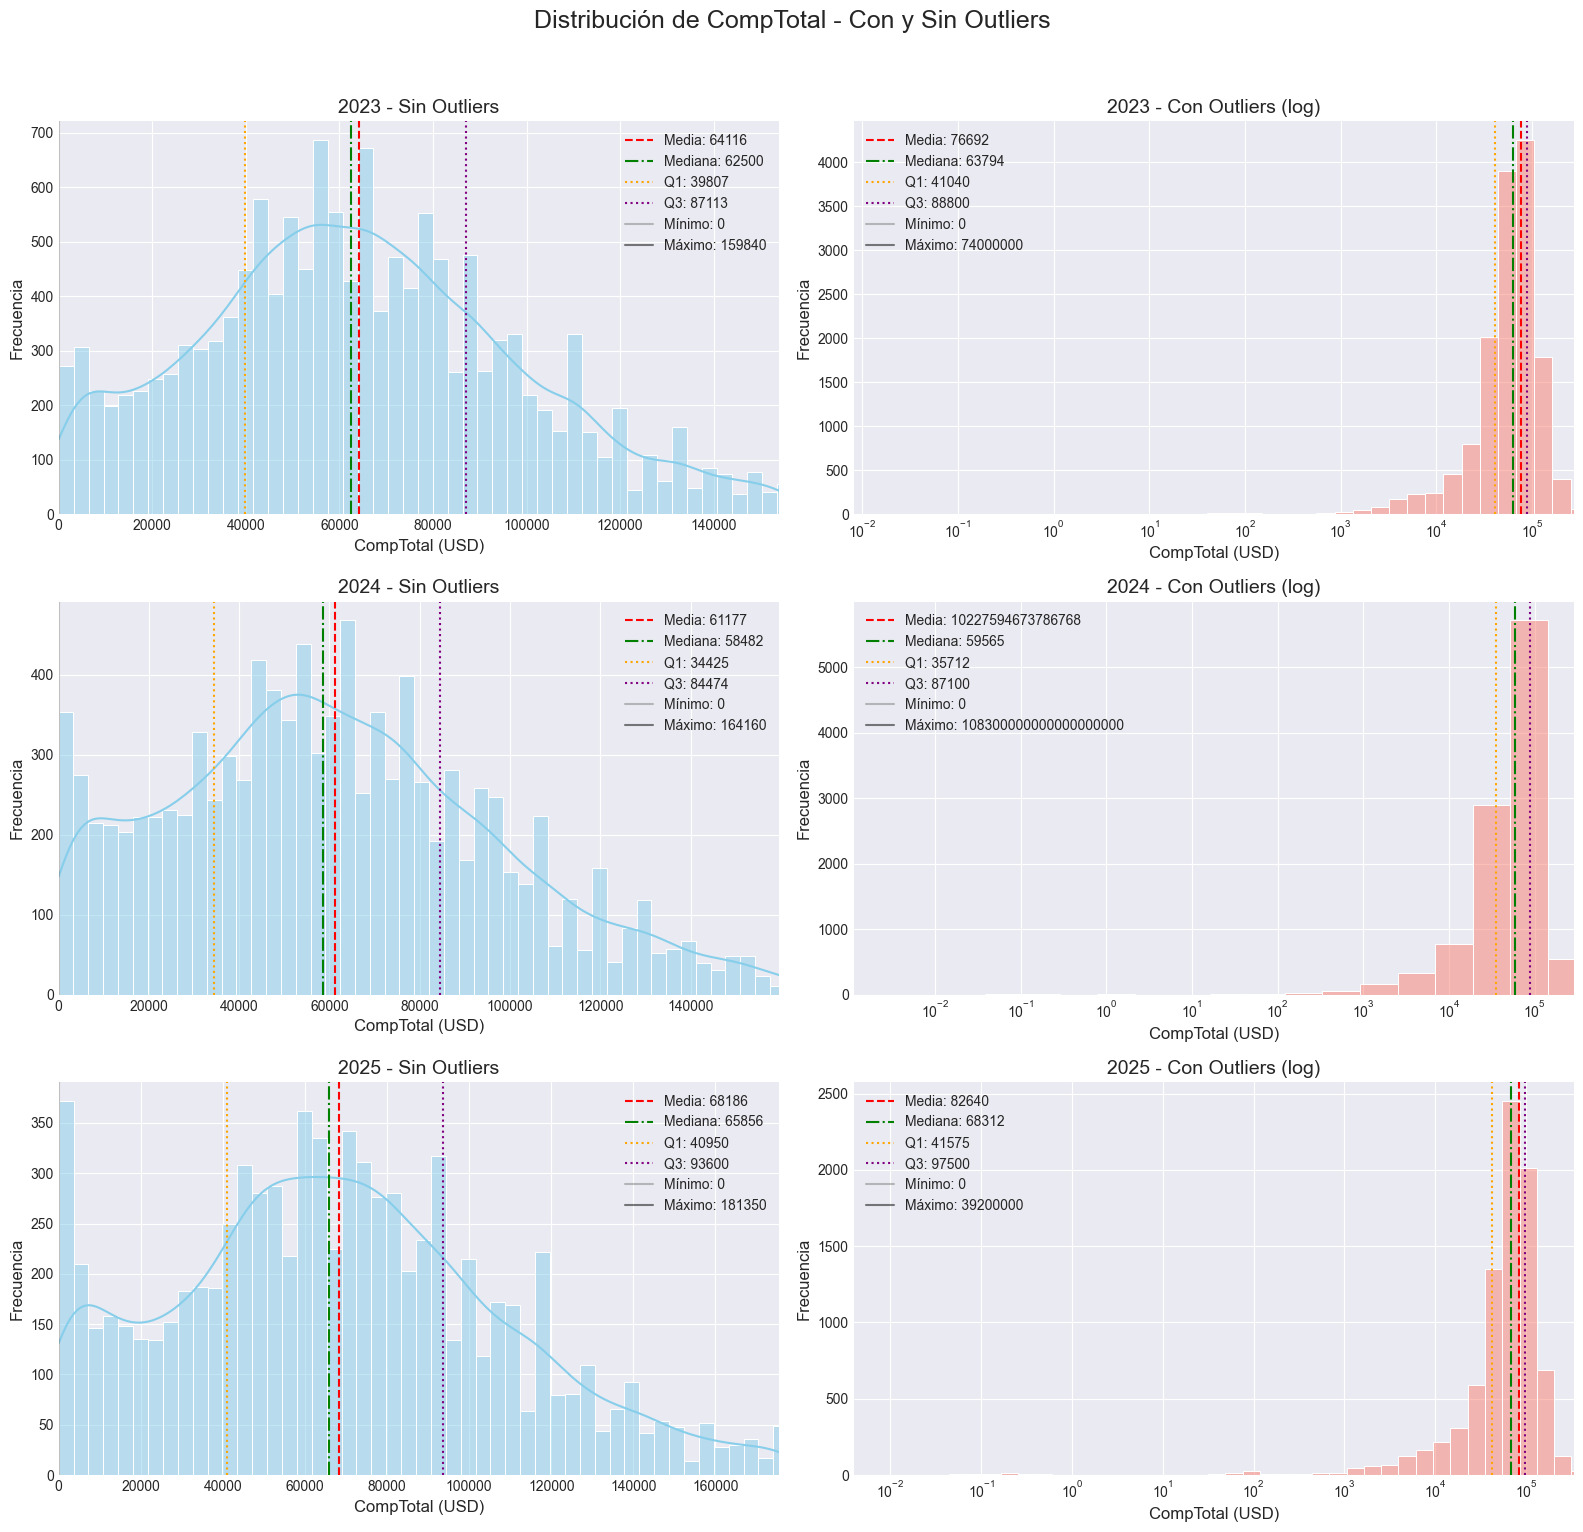

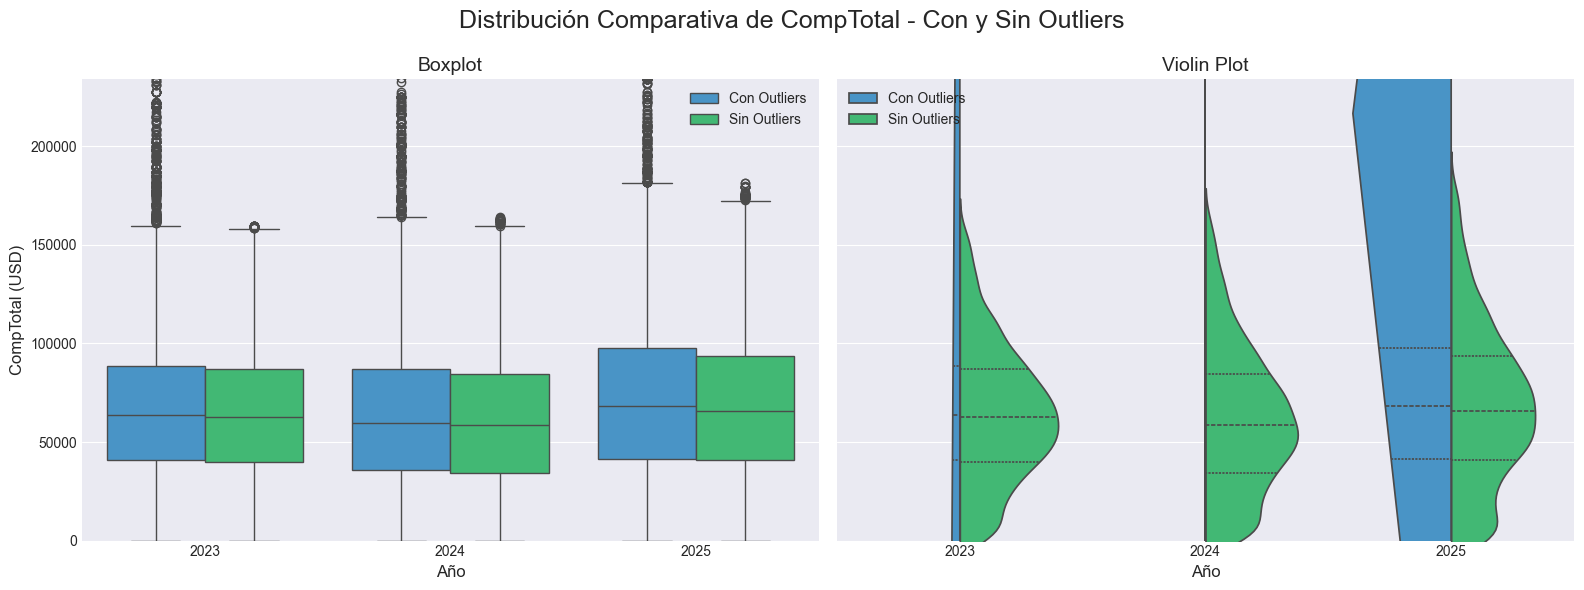

In [54]:
graficar_distribucion_completa(df_con_outliers=df_filtrado, df_sin_outliers=df_filtrado_sin_outliers, anios=ANIOS)

### Validación de hipótesis
0. Funciones Utilizadas
1. WorkExp - YearsCode vs CompTotal
2. RemoteWork vs CompTotal
3. Country vs CompTotal
4. LanguageHaveWorkedWith vs CompTotal
5. Age vs CompTotal

#### Funciones utilizadas

#### 1. WorkExp - YearsCode vs CompTotal

#### 2. RemoteWork vs CompTotal

#### 3. Country vs CompTotal

#### 4. LanguageHaveWorkedWith vs CompTotal

#### 5. Age vs CompTotal

## Conclusiones

### Resultados de las hipótesis

### Limitaciones del análisis

### Proximos pasos

### Referencias

- [Stack Overflow Annual Developer Survey](https://survey.stackoverflow.co/)
- [Stack Overflow Developer Survey 2023](https://survey.stackoverflow.co/2023)
- [Stack Overflow Developer Survey 2024](https://survey.stackoverflow.co/2024)
- [Stack Overflow Developer Survey 2025](https://survey.stackoverflow.co/2025)
- [Tasas de cambio históricas](https://www.xe.com/currencytables/)
- [Documentación de pandas](https://pandas.pydata.org/docs/)
- [Documentación de seaborn](https://seaborn.pydata.org/)
- [Documentación de matplotlib](https://matplotlib.org/stable/contents.html)

### Créditos

- [LinkedIn - Franco Maidana](www.linkedin.com/in/maidana-franco07)
- [Github - Franco Maidana](www.github.com/Maidana0)
- [Repositorio - Análisis de encuestas de desarrolladores](https://github.com/Maidana0/encuestas-stack-overflow)